# script to use RBM to study the attractor dynamics of response

In [1]:
% matplotlib inline

##
import importlib
import time
import numpy as np
import tensorflow as tf

import utils
import EBMs_tensorflow


importlib.reload(EBMs_tensorflow)

# load nmist data
(X_dtr, y_dtr), (X_dvl, y_dvl), (X_dts, y_dts) = utils.load_data()


/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


... loading data


# training

In [2]:
# create model adn tf computational graph

m0, m1 = 784, 512
batchsize = 32

n_total = X_dtr.shape[0]
x_in = X_dtr[:32]


##
importlib.reload(EBMs_tensorflow.ebm)
importlib.reload(EBMs_tensorflow.rbm)
importlib.reload(EBMs_tensorflow)
model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, batchsize=batchsize, path_log_dir='./model_log')

model.init_graph()
model.create_training_graph()

{'grad_b0': <tf.Tensor 'CD/grad_update/Assign:0' shape=(784,) dtype=float32_ref>, 'grad_b1': <tf.Tensor 'CD/grad_update/Assign_1:0' shape=(512,) dtype=float32_ref>, 'grad_w': <tf.Tensor 'CD/grad_update/Assign_2:0' shape=(784, 512) dtype=float32_ref>, 'b0': <tf.Tensor 'CD/grad_update/AssignAdd:0' shape=(784,) dtype=float32_ref>, 'b1': <tf.Tensor 'CD/grad_update/AssignAdd_1:0' shape=(512,) dtype=float32_ref>, 'w': <tf.Tensor 'CD/grad_update/AssignAdd_2:0' shape=(784, 512) dtype=float32_ref>}


In [3]:
# train from scratch

model.run_training(x0_data=X_dtr, num_epochs=20)


model paramter ['b0', 'b1', 'w'] updated from file
step=   0_    0, energy=+0.062357, sec/batch=0.07347, ms/sample=2.296
step=   0_  100, energy=+59.312, sec/batch=0.02194, ms/sample=0.6855
step=   0_  200, energy=+57.779, sec/batch=0.0191, ms/sample=0.597
step=   0_  300, energy=+39.528, sec/batch=0.01917, ms/sample=0.5992
step=   0_  400, energy=+42.109, sec/batch=0.0192, ms/sample=0.6001
step=   0_  500, energy=+28.57, sec/batch=0.01918, ms/sample=0.5995
step=   0_  600, energy=+38.026, sec/batch=0.01917, ms/sample=0.599
step=   0_  700, energy=+32.392, sec/batch=0.01916, ms/sample=0.5987
step=   0_  800, energy=+13.727, sec/batch=0.01914, ms/sample=0.5983
step=   0_  900, energy=-2.507, sec/batch=0.01918, ms/sample=0.5995
step=   0_ 1000, energy=-1.7444, sec/batch=0.01927, ms/sample=0.6023
step=   0_ 1100, energy=-32.771, sec/batch=0.01913, ms/sample=0.5979
step=   0_ 1200, energy=-26.713, sec/batch=0.01915, ms/sample=0.5985
step=   0_ 1300, energy=-22.265, sec/batch=0.01914, ms/sa

step=   7_  700, energy=-133.39, sec/batch=0.01921, ms/sample=0.6004
step=   7_  800, energy=-144.61, sec/batch=0.02153, ms/sample=0.6729
step=   7_  900, energy=-118.56, sec/batch=0.01919, ms/sample=0.5997
step=   7_ 1000, energy=-137.69, sec/batch=0.01927, ms/sample=0.6021
step=   7_ 1100, energy=-142.85, sec/batch=0.01926, ms/sample=0.602
step=   7_ 1200, energy=-119.34, sec/batch=0.01921, ms/sample=0.6004
step=   7_ 1300, energy=-133.15, sec/batch=0.01916, ms/sample=0.5987
step=   7_ 1400, energy=-119.38, sec/batch=0.01918, ms/sample=0.5994
step=   7_ 1500, energy=-141.79, sec/batch=0.01933, ms/sample=0.604
step=   8_    0, energy=-139.68, sec/batch=0.0119, ms/sample=0.372
step=   8_  100, energy=-146.52, sec/batch=0.01917, ms/sample=0.599
step=   8_  200, energy=-153.32, sec/batch=0.01908, ms/sample=0.5963
step=   8_  300, energy=-128.57, sec/batch=0.01911, ms/sample=0.5972
step=   8_  400, energy=-148.19, sec/batch=0.0192, ms/sample=0.5999
step=   8_  500, energy=-138.49, sec/bat

step=  14_ 1500, energy=-145.59, sec/batch=0.01921, ms/sample=0.6002
step=  15_    0, energy=-147.86, sec/batch=0.0119, ms/sample=0.372
step=  15_  100, energy=-153.69, sec/batch=0.01937, ms/sample=0.6054
step=  15_  200, energy=-161.6, sec/batch=0.01935, ms/sample=0.6047
step=  15_  300, energy=-153.24, sec/batch=0.01929, ms/sample=0.6027
step=  15_  400, energy=-169.84, sec/batch=0.01916, ms/sample=0.5986
step=  15_  500, energy=-155.59, sec/batch=0.01906, ms/sample=0.5956
step=  15_  600, energy=-156.25, sec/batch=0.01942, ms/sample=0.6069
step=  15_  700, energy=-154.89, sec/batch=0.01925, ms/sample=0.6015
step=  15_  800, energy=-155.13, sec/batch=0.01915, ms/sample=0.5984
step=  15_  900, energy=-152.48, sec/batch=0.01918, ms/sample=0.5995
step=  15_ 1000, energy=-151.19, sec/batch=0.01919, ms/sample=0.5998
step=  15_ 1100, energy=-150.25, sec/batch=0.01908, ms/sample=0.5964
step=  15_ 1200, energy=-154.79, sec/batch=0.01898, ms/sample=0.5931
step=  15_ 1300, energy=-151.2, sec/b

In [5]:
# save trained parameters to file
model.save_parameters(filename='RBM_tf_20_epoch')

writing model parameters to file ../model_save/RBM_tf_20_epoch_20180717_135854.h5


In [12]:
# load parameters from file file keep training

model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, batchsize=batchsize, path_log_dir='./model_log')

model.load_parameters(filename='RBM_tf_20_epoch')

model.init_graph()
model.create_training_graph()

model.run_training(x0_data=X_dtr, num_epochs=10)


reading model parameters from file ../model_save/RBM_tf_20_epoch_20180717_135854.h5
model paramter ['b0', 'b1', 'w'] updated from file
step=   0_    0, energy=-146.13, sec/batch=0.001005, ms/sample=0.03141
step=   0_  100, energy=-167.64, sec/batch=0.01938, ms/sample=0.6055
step=   0_  200, energy=-156.47, sec/batch=0.01917, ms/sample=0.599
step=   0_  300, energy=-152.13, sec/batch=0.01918, ms/sample=0.5992
step=   0_  400, energy=-152.01, sec/batch=0.01915, ms/sample=0.5984
step=   0_  500, energy=-150.27, sec/batch=0.01915, ms/sample=0.5983
step=   0_  600, energy=-150.35, sec/batch=0.01917, ms/sample=0.599
step=   0_  700, energy=-145.05, sec/batch=0.01914, ms/sample=0.5983
step=   0_  800, energy=-142.81, sec/batch=0.01919, ms/sample=0.5998
step=   0_  900, energy=-159.93, sec/batch=0.01911, ms/sample=0.5973
step=   0_ 1000, energy=-162.23, sec/batch=0.0191, ms/sample=0.5969
step=   0_ 1100, energy=-157.52, sec/batch=0.01916, ms/sample=0.5988
step=   0_ 1200, energy=-166.4, sec/ba

step=   7_  600, energy=-158.58, sec/batch=0.01919, ms/sample=0.5996
step=   7_  700, energy=-153.85, sec/batch=0.01913, ms/sample=0.5978
step=   7_  800, energy=-144.34, sec/batch=0.01914, ms/sample=0.5982
step=   7_  900, energy=-154.89, sec/batch=0.01954, ms/sample=0.6106
step=   7_ 1000, energy=-149.08, sec/batch=0.01918, ms/sample=0.5995
step=   7_ 1100, energy=-157.28, sec/batch=0.01923, ms/sample=0.6008
step=   7_ 1200, energy=-152.14, sec/batch=0.01912, ms/sample=0.5974
step=   7_ 1300, energy=-158.7, sec/batch=0.01931, ms/sample=0.6034
step=   7_ 1400, energy=-158.58, sec/batch=0.01939, ms/sample=0.6059
step=   7_ 1500, energy=-156.92, sec/batch=0.01918, ms/sample=0.5994
step=   8_    0, energy=-156.27, sec/batch=0.0119, ms/sample=0.3719
step=   8_  100, energy=-153.26, sec/batch=0.01923, ms/sample=0.6011
step=   8_  200, energy=-158.66, sec/batch=0.01923, ms/sample=0.6009
step=   8_  300, energy=-157.61, sec/batch=0.01925, ms/sample=0.6014
step=   8_  400, energy=-152.63, sec

In [13]:
model.lr = 0.005         # reduce learning rate
model.wd_l2 = 10**(-6)   # reduce L2 weight decay

model.init_graph()
model.create_training_graph()

model.run_training(x0_data=X_dtr, num_epochs=10)

model paramter ['b0', 'b1', 'w'] updated from file
step=   0_    0, energy=-147.44, sec/batch=0.001042, ms/sample=0.03257
step=   0_  100, energy=-140.18, sec/batch=0.01953, ms/sample=0.6102
step=   0_  200, energy=-150.31, sec/batch=0.01932, ms/sample=0.6038
step=   0_  300, energy=-160.86, sec/batch=0.01927, ms/sample=0.6021
step=   0_  400, energy=-154.32, sec/batch=0.01915, ms/sample=0.5985
step=   0_  500, energy=-158.55, sec/batch=0.01929, ms/sample=0.6027
step=   0_  600, energy=-161.35, sec/batch=0.01932, ms/sample=0.6036
step=   0_  700, energy=-159.91, sec/batch=0.01932, ms/sample=0.6037
step=   0_  800, energy=-151.21, sec/batch=0.01926, ms/sample=0.602
step=   0_  900, energy=-160.44, sec/batch=0.01928, ms/sample=0.6024
step=   0_ 1000, energy=-164.99, sec/batch=0.01928, ms/sample=0.6026
step=   0_ 1100, energy=-150.53, sec/batch=0.01925, ms/sample=0.6015
step=   0_ 1200, energy=-181.85, sec/batch=0.01927, ms/sample=0.6022
step=   0_ 1300, energy=-175.31, sec/batch=0.01927,

step=   7_  700, energy=-183.3, sec/batch=0.01917, ms/sample=0.599
step=   7_  800, energy=-195.14, sec/batch=0.01918, ms/sample=0.5993
step=   7_  900, energy=-186.06, sec/batch=0.0191, ms/sample=0.5968
step=   7_ 1000, energy=-182.03, sec/batch=0.0192, ms/sample=0.5999
step=   7_ 1100, energy=-194.33, sec/batch=0.01918, ms/sample=0.5995
step=   7_ 1200, energy=-174.8, sec/batch=0.01917, ms/sample=0.5992
step=   7_ 1300, energy=-178.98, sec/batch=0.01905, ms/sample=0.5953
step=   7_ 1400, energy=-191.31, sec/batch=0.01916, ms/sample=0.5989
step=   7_ 1500, energy=-182.24, sec/batch=0.01911, ms/sample=0.5971
step=   8_    0, energy=-191.35, sec/batch=0.0119, ms/sample=0.372
step=   8_  100, energy=-178.67, sec/batch=0.01918, ms/sample=0.5995
step=   8_  200, energy=-189.69, sec/batch=0.01917, ms/sample=0.5991
step=   8_  300, energy=-189.54, sec/batch=0.01917, ms/sample=0.5991
step=   8_  400, energy=-186.23, sec/batch=0.01921, ms/sample=0.6002
step=   8_  500, energy=-185.89, sec/batc

In [14]:
model.save_parameters(filename='RBM_tf_40_epoch')

writing model parameters to file ../model_save/RBM_tf_40_epoch_20180717_151003.h5


In [83]:
model.lr = 0.005         # reduce learning rate
model.wd_l2 = 10**(-6)   # reduce L2 weight decay

model.init_graph()
model.create_training_graph()

model.run_training(x0_data=X_dtr, num_epochs=40)

model.save_parameters(filename='RBM_tf_80_epoch')

step=   0_    0, energy=-181.99, sec/batch=0.001031, ms/sample=0.03222
step=   0_  100, energy=-185.83, sec/batch=0.02001, ms/sample=0.6253
step=   0_  200, energy=-195.22, sec/batch=0.01938, ms/sample=0.6055
step=   0_  300, energy=-184.07, sec/batch=0.01893, ms/sample=0.5914
step=   0_  400, energy=-190.05, sec/batch=0.01909, ms/sample=0.5965
step=   0_  500, energy=-190.1, sec/batch=0.0191, ms/sample=0.597
step=   0_  600, energy=-182.61, sec/batch=0.01911, ms/sample=0.5971
step=   0_  700, energy=-186.51, sec/batch=0.01912, ms/sample=0.5975
step=   0_  800, energy=-181.44, sec/batch=0.01913, ms/sample=0.5977
step=   0_  900, energy=-184.89, sec/batch=0.01912, ms/sample=0.5974
step=   0_ 1000, energy=-164.47, sec/batch=0.01901, ms/sample=0.5942
step=   0_ 1100, energy=-186.48, sec/batch=0.01911, ms/sample=0.5971
step=   0_ 1200, energy=-194.02, sec/batch=0.01911, ms/sample=0.5971
step=   0_ 1300, energy=-184.89, sec/batch=0.02089, ms/sample=0.6529
step=   0_ 1400, energy=-186.88, se

step=   7_  800, energy=-187.7, sec/batch=0.0191, ms/sample=0.597
step=   7_  900, energy=-191.05, sec/batch=0.01911, ms/sample=0.5972
step=   7_ 1000, energy=-185.09, sec/batch=0.0191, ms/sample=0.597
step=   7_ 1100, energy=-183.26, sec/batch=0.01911, ms/sample=0.5973
step=   7_ 1200, energy=-184.51, sec/batch=0.01907, ms/sample=0.5961
step=   7_ 1300, energy=-193.01, sec/batch=0.01912, ms/sample=0.5975
step=   7_ 1400, energy=-197.21, sec/batch=0.01904, ms/sample=0.595
step=   7_ 1500, energy=-191.5, sec/batch=0.01909, ms/sample=0.5967
step=   8_    0, energy=-189.81, sec/batch=0.01187, ms/sample=0.3711
step=   8_  100, energy=-196.68, sec/batch=0.01914, ms/sample=0.5982
step=   8_  200, energy=-190.25, sec/batch=0.01911, ms/sample=0.5972
step=   8_  300, energy=-188.96, sec/batch=0.01911, ms/sample=0.5972
step=   8_  400, energy=-182.52, sec/batch=0.01904, ms/sample=0.5949
step=   8_  500, energy=-181.48, sec/batch=0.01908, ms/sample=0.5962
step=   8_  600, energy=-191.56, sec/batc

step=  15_    0, energy=-198.01, sec/batch=0.01181, ms/sample=0.3689
step=  15_  100, energy=-199.38, sec/batch=0.01898, ms/sample=0.5932
step=  15_  200, energy=-187.01, sec/batch=0.01901, ms/sample=0.5941
step=  15_  300, energy=-202.48, sec/batch=0.02149, ms/sample=0.6716
step=  15_  400, energy=-193.69, sec/batch=0.01908, ms/sample=0.5964
step=  15_  500, energy=-205.08, sec/batch=0.01911, ms/sample=0.5971
step=  15_  600, energy=-187.01, sec/batch=0.01913, ms/sample=0.5979
step=  15_  700, energy=-204.36, sec/batch=0.0191, ms/sample=0.5969
step=  15_  800, energy=-191.65, sec/batch=0.01909, ms/sample=0.5965
step=  15_  900, energy=-190.06, sec/batch=0.01921, ms/sample=0.6004
step=  15_ 1000, energy=-189.47, sec/batch=0.01907, ms/sample=0.5959
step=  15_ 1100, energy=-194.75, sec/batch=0.0191, ms/sample=0.597
step=  15_ 1200, energy=-202.24, sec/batch=0.0191, ms/sample=0.5968
step=  15_ 1300, energy=-191.33, sec/batch=0.01916, ms/sample=0.5988
step=  15_ 1400, energy=-193.66, sec/b

step=  22_  800, energy=-197.99, sec/batch=0.01921, ms/sample=0.6003
step=  22_  900, energy=-196.65, sec/batch=0.01912, ms/sample=0.5974
step=  22_ 1000, energy=-195.8, sec/batch=0.01914, ms/sample=0.598
step=  22_ 1100, energy=-204.1, sec/batch=0.01909, ms/sample=0.5967
step=  22_ 1200, energy=-195.43, sec/batch=0.01914, ms/sample=0.598
step=  22_ 1300, energy=-192.63, sec/batch=0.01911, ms/sample=0.5973
step=  22_ 1400, energy=-200.68, sec/batch=0.01909, ms/sample=0.5966
step=  22_ 1500, energy=-201.12, sec/batch=0.01904, ms/sample=0.5949
step=  23_    0, energy=-196.87, sec/batch=0.01186, ms/sample=0.3707
step=  23_  100, energy=-196.08, sec/batch=0.01911, ms/sample=0.5972
step=  23_  200, energy=-198.83, sec/batch=0.01911, ms/sample=0.5973
step=  23_  300, energy=-198.25, sec/batch=0.01907, ms/sample=0.5959
step=  23_  400, energy=-202.19, sec/batch=0.01911, ms/sample=0.597
step=  23_  500, energy=-198.6, sec/batch=0.01905, ms/sample=0.5953
step=  23_  600, energy=-198.36, sec/bat

step=  30_    0, energy=-198.21, sec/batch=0.01189, ms/sample=0.3716
step=  30_  100, energy=-199.3, sec/batch=0.01908, ms/sample=0.5964
step=  30_  200, energy=-193.62, sec/batch=0.01913, ms/sample=0.5978
step=  30_  300, energy=-193.26, sec/batch=0.01911, ms/sample=0.5971
step=  30_  400, energy=-194.0, sec/batch=0.019, ms/sample=0.5936
step=  30_  500, energy=-196.57, sec/batch=0.0191, ms/sample=0.5968
step=  30_  600, energy=-189.6, sec/batch=0.01904, ms/sample=0.595
step=  30_  700, energy=-188.18, sec/batch=0.01905, ms/sample=0.5953
step=  30_  800, energy=-185.7, sec/batch=0.01907, ms/sample=0.5959
step=  30_  900, energy=-194.04, sec/batch=0.01911, ms/sample=0.5972
step=  30_ 1000, energy=-190.89, sec/batch=0.01909, ms/sample=0.5967
step=  30_ 1100, energy=-205.48, sec/batch=0.01913, ms/sample=0.5977
step=  30_ 1200, energy=-198.37, sec/batch=0.01909, ms/sample=0.5966
step=  30_ 1300, energy=-194.76, sec/batch=0.01913, ms/sample=0.5977
step=  30_ 1400, energy=-202.29, sec/batch

step=  37_  800, energy=-196.46, sec/batch=0.0191, ms/sample=0.597
step=  37_  900, energy=-202.49, sec/batch=0.01911, ms/sample=0.597
step=  37_ 1000, energy=-184.02, sec/batch=0.01914, ms/sample=0.598
step=  37_ 1100, energy=-210.64, sec/batch=0.01913, ms/sample=0.5977
step=  37_ 1200, energy=-199.04, sec/batch=0.01914, ms/sample=0.5983
step=  37_ 1300, energy=-205.17, sec/batch=0.01909, ms/sample=0.5964
step=  37_ 1400, energy=-209.74, sec/batch=0.01906, ms/sample=0.5957
step=  37_ 1500, energy=-198.68, sec/batch=0.01909, ms/sample=0.5967
step=  38_    0, energy=-215.08, sec/batch=0.01187, ms/sample=0.3711
step=  38_  100, energy=-204.87, sec/batch=0.01912, ms/sample=0.5974
step=  38_  200, energy=-195.04, sec/batch=0.01912, ms/sample=0.5976
step=  38_  300, energy=-210.06, sec/batch=0.01908, ms/sample=0.5962
step=  38_  400, energy=-200.38, sec/batch=0.01913, ms/sample=0.5978
step=  38_  500, energy=-206.64, sec/batch=0.01907, ms/sample=0.5959
step=  38_  600, energy=-201.9, sec/ba

In [7]:
importlib.reload(EBMs_tensorflow.ebm)
importlib.reload(EBMs_tensorflow.rbm)
importlib.reload(EBMs_tensorflow)
model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, 
                                                       batchsize=batchsize, path_log_dir='./model_log', 
                                                       momentum=None)

model.init_graph()
model.create_training_graph()

model.run_training(x0_data=X_dtr, num_epochs=1)

{'b0': <tf.Tensor 'CD/grad_update/AssignAdd:0' shape=(784,) dtype=float32_ref>, 'b1': <tf.Tensor 'CD/grad_update/AssignAdd_1:0' shape=(512,) dtype=float32_ref>, 'w': <tf.Tensor 'CD/grad_update/AssignAdd_2:0' shape=(784, 512) dtype=float32_ref>}
step=   0_    0, energy=+0.0040639, sec/batch=0.001548, ms/sample=0.04837
step=   0_  100, energy=+60.718, sec/batch=0.0197, ms/sample=0.6157
step=   0_  200, energy=+50.267, sec/batch=0.01929, ms/sample=0.6028
step=   0_  300, energy=+53.747, sec/batch=0.01935, ms/sample=0.6048
step=   0_  400, energy=+41.924, sec/batch=0.01932, ms/sample=0.6039
step=   0_  500, energy=+35.128, sec/batch=0.01934, ms/sample=0.6044
step=   0_  600, energy=+34.116, sec/batch=0.01937, ms/sample=0.6052
step=   0_  700, energy=+12.151, sec/batch=0.01948, ms/sample=0.6088
step=   0_  800, energy=+7.9784, sec/batch=0.01944, ms/sample=0.6074
step=   0_  900, energy=+0.2416, sec/batch=0.01923, ms/sample=0.601
step=   0_ 1000, energy=+3.4136, sec/batch=0.01936, ms/sample=

# visualize learnt weight

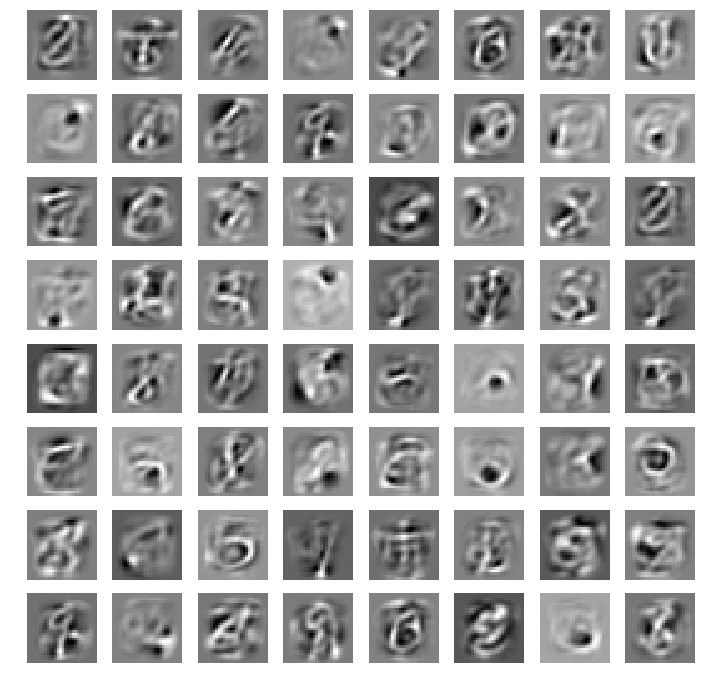

In [19]:
import matplotlib.pyplot as plt

utils.data_plot(model.dict_params['w'].transpose(), n=64)

plt.gcf().set_size_inches((12,12))

# Inference

In [56]:
importlib.reload(EBMs_tensorflow.ebm)
importlib.reload(EBMs_tensorflow.rbm)
importlib.reload(EBMs_tensorflow)


model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, batchsize=batchsize, path_log_dir='./model_log')

model.load_parameters(filename='RBM_tf_80_epoch')

model.init_graph()
model.create_inference_graph(num_steps=20)

reading model parameters from file ../model_save/RBM_tf_80_epoch_20180717_161606.h5


In [38]:
X_dtr_subset = X_dtr[:64]
result = model.run_inference(x0_data=X_dtr_subset)


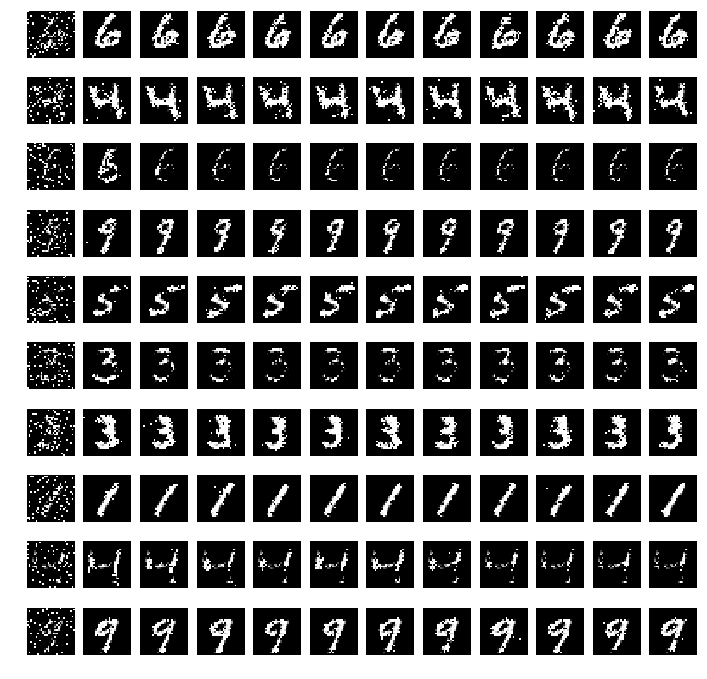

In [76]:
import matplotlib.pyplot as plt

X_dtr_subset = X_dtr[:64]

yn_degradate = np.random.rand(model.M[0])<0.6
proportion_pos = np.mean(X_dtr[:64])
X_dtr_subset = X_dtr_subset*(1-yn_degradate) + (np.random.rand(64, model.M[0])<proportion_pos)*yn_degradate

# use clamp to make sure the clampled nodes will not be affected
model.clamp = {'x0': np.logical_not(yn_degradate)}
# model.clamp = None


model.init_graph()
model.create_inference_graph(num_steps=10)

result = {'p0': X_dtr_subset, 'x0': X_dtr_subset}
num_iteration =12
num_seed = 10
indexes_seed = np.random.permutation(64)[:num_seed]
h_fig, h_axes = plt.subplots(num_seed, num_iteration, figsize=[12, 12])
for j in range(num_iteration):
    for i, i_seed in enumerate(indexes_seed):
        plt.axes(h_axes[i, j])
        utils.data_plot(result['x0'], i=i_seed)
    result = model.run_inference(x0_data=result['x0'])

In [90]:
model.tensors

{'x0_in': <tf.Tensor 'x0_in:0' shape=(32, 784) dtype=float32>,
 'b0': <tf.Variable 'b0:0' shape=(784,) dtype=float32_ref>,
 'b1': <tf.Variable 'b1:0' shape=(512,) dtype=float32_ref>,
 'w': <tf.Variable 'w:0' shape=(784, 512) dtype=float32_ref>,
 'var_init': <tf.Operation 'init' type=NoOp>,
 'var_update': {'b0': <tf.Tensor 'var_update/Assign:0' shape=(784,) dtype=float32_ref>,
  'b1': <tf.Tensor 'var_update/Assign_1:0' shape=(512,) dtype=float32_ref>,
  'w': <tf.Tensor 'var_update/Assign_2:0' shape=(784, 512) dtype=float32_ref>},
 'grad_b0': <tf.Variable 'momentum/gard_b0:0' shape=(784,) dtype=float32_ref>,
 'grad_b1': <tf.Variable 'momentum/gard_b1:0' shape=(512,) dtype=float32_ref>,
 'grad_w': <tf.Variable 'momentum/gard_w:0' shape=(784, 512) dtype=float32_ref>,
 'cd': {'grad_b0': <tf.Tensor 'CD/grad_update/Assign:0' shape=(784,) dtype=float32_ref>,
  'grad_b1': <tf.Tensor 'CD/grad_update/Assign_1:0' shape=(512,) dtype=float32_ref>,
  'grad_w': <tf.Tensor 'CD/grad_update/Assign_2:0' s